# Instacart Order Analysis  
###### Jainabou Barry Danfa --- SI 618 Data Manipulation and Analysis WN 2019 Final Project

### Motivation

> This project looks at the Instacart Online Grocery Shopping Dataset in 2017. Instacart is a online grocery shpooing company in which users select the items they want and instacart facilitates a "shopper" for that order and then delivers it to the users address. This dataset was interesting to me due to the insights that one could gather from from 3 million grocery orders. The specific questions I decided to explore in this dataset are:  
1. What are the top products ordered by customers? 
2. What is the typical user profile? (Number of orders, types of foods, ect) 
3. What types of products are ordered around specific times? 
4. Can we predict your order based on the first item?

### Data Source

> The dataset I used was from Instacart published dataset for orders in 2017. The link to the data is:  https://www.instacart.com/datasets/grocery-shopping-2017. The format was in 4 seperate csv files with order_id, product_id, and user_id as unique identifiers linking the seperate tables. There werea total of 3,421,083 orders and 49,688 products in our data. The section (Data input and processing) details the columns and size of all tables used and how they were joined for the analysis. 


### Data input and processing

This section imports all three tables used in this workbook as pandas dataframes and joining all dataframes into one on the corresponding identifier. For the sake of scaling the project to workable quantities, I will only select the first 2 million individual orders

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns

In [15]:
#upload data
pdt=pd.read_csv('data/products.csv')
print('total products in dataset: {}'.format(pdt.shape[0]))

total products in dataset: 49688


In [16]:
pdt.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [17]:
order=pd.read_csv('data/orders.csv')
print('total orders in dataset: {}'.format(order.shape[0]))

total orders in dataset: 3421083


In [18]:
order.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [19]:
dept=pd.read_csv('data/departments.csv')
print('total departments in dataset: {}'.format(dept.shape[0]))

total departments in dataset: 21


In [20]:
dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [21]:
order_pdt_set=pd.read_csv('data/order_products__prior.csv')
print('total item detail for each order in dataset: {}'.format(order_pdt_set.shape[0]))

total item detail for each order in dataset: 32434489


In [22]:
order_pdt_set.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [23]:
order_pdt=order_pdt_set.sample(n=2000000)

In [24]:
#join the tables on the product id
df_com=pdt.merge(order_pdt, on='product_id', how='left')

In [26]:
#join the tables on the order id
df_com=order.merge(df_com, on='order_id', how='left')

In [27]:
#join the tables on the dept id
df_com=dept.merge(df_com, on='department_id', how='left')

In [28]:
#drop the eval_set 
df_com=df_com.drop(columns='eval_set')

In [29]:
df_com.head()

,department_id,department,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name,aisle_id,add_to_cart_order,reordered
0,1,frozen,3225766,3,8,0,17,7.0,48523.0,Birthday Cake Light Ice Cream,37.0,8.0,0.0
1,1,frozen,3160850,3,9,0,16,7.0,48523.0,Birthday Cake Light Ice Cream,37.0,5.0,1.0
2,1,frozen,121053,7,3,0,18,30.0,39121.0,Organic Jasmine Rice,38.0,3.0,0.0
3,1,frozen,3120740,7,15,3,16,2.0,21298.0,Organic Cake Cones,37.0,10.0,0.0
4,1,frozen,68288,10,2,5,15,30.0,20995.0,Organic Broccoli Florets,116.0,3.0,0.0


In [30]:
df_com.to_csv('data.csv')

### What are the top products ordered by customers?

##### Methods

In [31]:
#extact all values from the product_name column 
products=df_com['product_name'].dropna().tolist()

In [32]:
#import counter to create a dictionary of word and counts
from collections import Counter
pd_count=Counter(products)

In [33]:
#adding top 30 words to this list
pd_count=pd_count.most_common(30)

In [34]:
import matplotlib.pyplot as plt # plotting

In [35]:
#converting to a pandas dataframe
plot_df=pd.DataFrame(pd_count)

In [45]:
import nltk

In [36]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

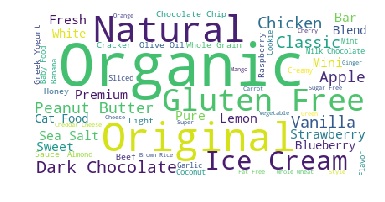

In [331]:
#adding top 30 words to this list
pd_word=pd_count.most_common(100000)

plot_word=pd.DataFrame(pd_word)

words=plot_word[0].tolist()
words=','.join(words)
wordcloud=WordCloud(stopwords=STOPWORDS, background_color='white', max_font_size=70, max_words=60).generate(words)

#plot wordcloud
plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

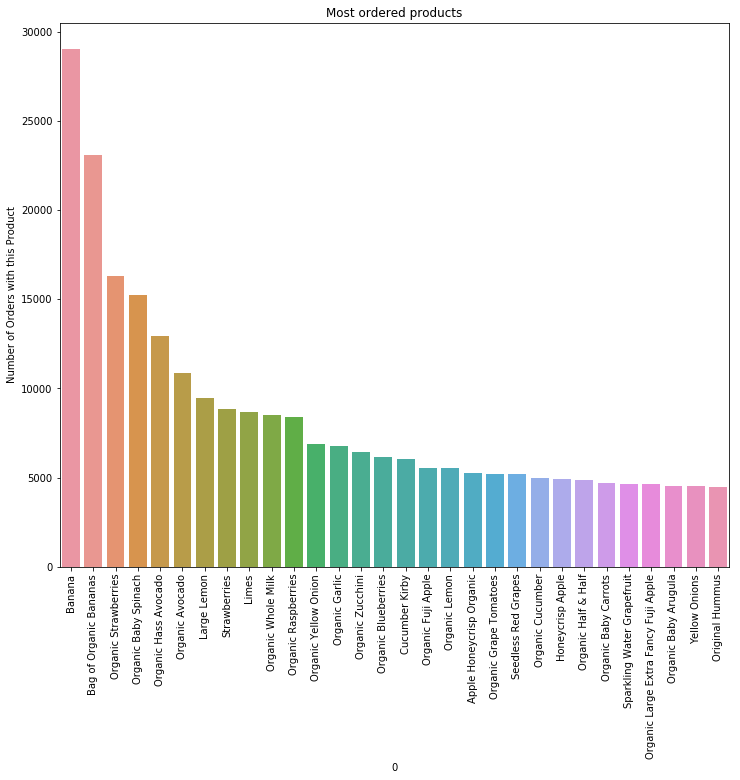

In [55]:
f, ax = plt.subplots(figsize=(12, 10))
plt.xticks(rotation='vertical')
sns.barplot(plot_df[0], plot_df[1])
plt.ylabel('Number of Orders with this Product')
plt.title('Most ordered products')
plt.savefig('most_or.png')

<img src="capture.png">

<img src="capture2.png">

> The analysis showed that ...   
This visualization highlights the ...  

### What is the typical user profile? (ie. Number of orders, types of foods, ect. )

##### Methods

In [56]:
user_det=df_com.groupby('user_id')

In [57]:
len(user_det.groups)

190095

In [58]:
#the max number of items a person has made
user_det.size().max()

241

In [59]:
#the min number od items a person has made 
user_det.size().min()

1

In [60]:
#the mean number of items a person has made 
user_det.size().mean()

10.521055261842763

In [61]:
#the median number of items a person has made 
user_det.size().median()

6.0

Text(0.5, 1.0, 'The number of items per order')

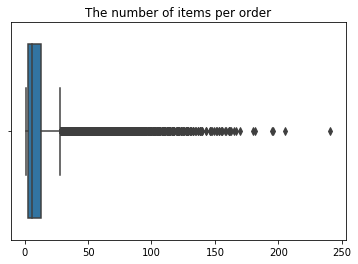

In [62]:
#the number of items in each order
sns.boxplot(x=user_det.size()).set_title('The number of items per order')

Text(0.5, 1.0, 'The number of orders per user')

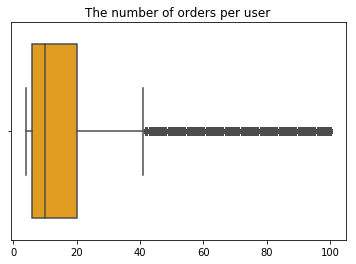

In [63]:
#the range of orders each user makes
sns.boxplot(x=order.groupby('user_id').size(), color='orange').set_title('The number of orders per user')
# plt.title('test')

In [86]:
df_com.head()

,department_id,department,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name,aisle_id,add_to_cart_order,reordered
0,1,frozen,3225766,3,8,0,17,7.0,48523.0,Birthday Cake Light Ice Cream,37.0,8.0,0.0
1,1,frozen,3160850,3,9,0,16,7.0,48523.0,Birthday Cake Light Ice Cream,37.0,5.0,1.0
2,1,frozen,121053,7,3,0,18,30.0,39121.0,Organic Jasmine Rice,38.0,3.0,0.0
3,1,frozen,3120740,7,15,3,16,2.0,21298.0,Organic Cake Cones,37.0,10.0,0.0
4,1,frozen,68288,10,2,5,15,30.0,20995.0,Organic Broccoli Florets,116.0,3.0,0.0


In [67]:
#what are the hours of the day users make orders
user_hrs=user_det['order_hour_of_day'].mean()

Text(0.5, 1.0, 'Distribution of hours users make orders')

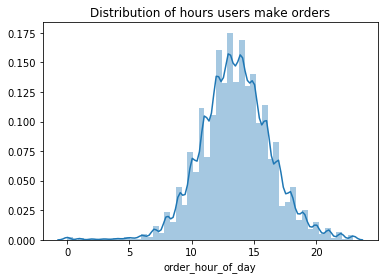

In [70]:
sns.distplot(user_hrs).set_title('Distribution of hours users make orders')

In [350]:
#what are the hours of the day users make orders
user_day=df_com[['order_dow']]
convert={0:'Sun', 1:'Mon', 2:'Tue',3:'Wed',4:'Thur',5:'Fri',6:'Sat'}
user_day['day']=user_day.apply(lambda row: convert[row.order_dow],axis=1)
# user_con.head()
# sns.countplot(x="order_dow", data=user_con)
# sns.distplot(user_day).set_title('Distribution of the day users make orders')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0    Sun
1    Sun
2    Sun
3    Wed
4    Fri
Name: order_dow, dtype: object

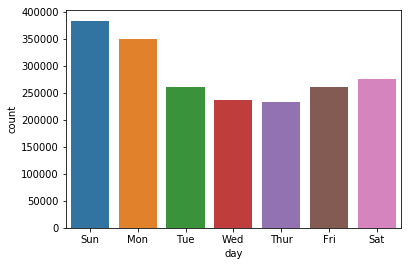

In [354]:
sns.countplot(x="day", data=user_day, order=convert.values())

In [351]:
user_day.head()

,order_dow,day
0,0,Sun
1,0,Sun
2,0,Sun
3,3,Wed
4,5,Fri


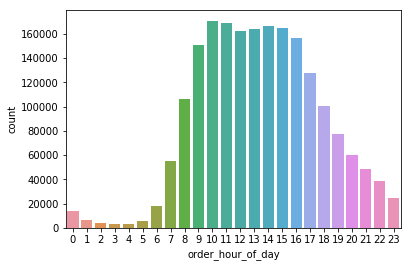

In [336]:
sns.countplot(x="order_hour_of_day", data=df_com)

### What are the types of products ordered around specific times?

##### Methods

Text(0.5, 1.0, 'Order amounts for each hour')

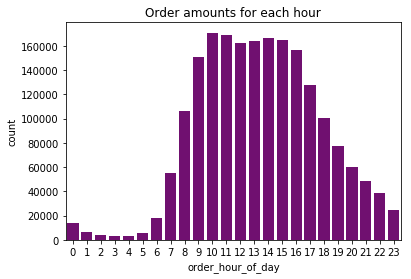

In [73]:
#what times are the orders normally placed
sns.countplot(x=df_com.order_hour_of_day, color='purple')
plt.title('Order amounts for each hour')


In [123]:
#groupby order_hour of the day
prod_hr=df_com.groupby(['order_hour_of_day', 'product_name'])

In [125]:
prod_hr2=df_com.groupby(['order_hour_of_day'])['product_name'].count()

In [133]:
prod3=df_com[['order_hour_of_day', 'product_name']]

In [134]:
prod3.head()

,order_hour_of_day,product_name
0,17,Birthday Cake Light Ice Cream
1,16,Birthday Cake Light Ice Cream
2,18,Organic Jasmine Rice
3,16,Organic Cake Cones
4,15,Organic Broccoli Florets


In [171]:
hi_hr=prod3.groupby(['order_hour_of_day', 'product_name']).product_name.agg('count').to_frame('c').reset_index()

In [178]:
hi_hr.groupby(['order_hour_of_day']).max()

,product_name,c
order_hour_of_day,,
0,with Crispy Almonds Cereal,173
1,smartwater® Electrolyte Enhanced Water,86
2,Zucchini Noodles,49
3,from Concentrate Mango Nectar,45
4,with Dawn Action Pacs Fresh Scent Dishwasher D...,42
5,with Crispy Almonds Cereal,79
6,with Xylitol Original Flavor 18 Sticks Sugar F...,266
7,with Xylitol Cinnamon 18 Sticks Sugar Free Gum,940
8,with Xylitol Cinnamon 18 Sticks Sugar Free Gum,1664


In [195]:
prod4=df_com.loc[(df_com['department']!='snacks')& (df_com['department']!='other')&(df_com['department']!='missing'),['order_hour_of_day', 'product_name', 'department']]

In [196]:
prod4.department.unique()

array(['frozen', 'bakery', 'produce', 'alcohol', 'international',
       'beverages', 'pets', 'dry goods pasta', 'bulk', 'personal care',
       'meat seafood', 'pantry', 'breakfast', 'canned goods',
       'dairy eggs', 'household', 'babies', 'deli'], dtype=object)

In [197]:
hi_hr2=prod4.groupby(['order_hour_of_day', 'product_name']).product_name.agg('count').to_frame('c').reset_index()

In [205]:
hi_hr2.groupby(['order_hour_of_day']).max()

,product_name,c
order_hour_of_day,,
0,with Crispy Almonds Cereal,173
1,smartwater® Electrolyte Enhanced Water,86
2,Zucchini Noodles,49
3,from Concentrate Mango Nectar,45
4,with Dawn Action Pacs Fresh Scent Dishwasher D...,42
5,with Crispy Almonds Cereal,79
6,with Olive Oil Mayonnaise Dressing,266
7,with Olive Oil Mayonnaise Dressing,940
8,with Olive Oil Mayonnaise Dressing,1664


In [206]:
#create dataframe with order and list
df_time=order.merge(order_pdt, on='order_id')

In [221]:
df_time=df_time[['order_id', 'order_hour_of_day', 'product_id']]

In [209]:
df_time.head()

,order_id,order_hour_of_day,product_id
0,2539329,8,12427
1,431534,15,196
2,550135,9,25133
3,1901567,10,32792
4,1673511,11,47553


In [211]:
#count top words again
from collections import Counter
pd_count=Counter(products)

In [266]:
#obtain top 5000 items
pd_count_5000=pd_count.most_common(3000)

In [267]:
#converting to a pandas dataframe
plot_hr=pd.DataFrame(pd_count_5000)

In [268]:
plot_hr.columns=['product_name', 'tot_count']

In [269]:
#obtain product_id
top_prod=plot_hr.merge(pdt, on='product_name')

In [270]:
top_prod=top_prod.drop(['aisle_id', 'department_id'], axis=1)

In [229]:
top_prod.head()

,product_name,tot_count,product_id
0,Banana,29044,24852
1,Bag of Organic Bananas,23120,13176
2,Organic Strawberries,16296,21137
3,Organic Baby Spinach,15214,21903
4,Organic Hass Avocado,12921,47209


In [271]:
#only keep top products on original dataframe
df_time=df_time.loc[df_time['product_id'].isin(top_prod.product_id)]

In [231]:
df_time.head()

,order_id,order_hour_of_day,product_id
0,2539329,8,12427
1,431534,15,196
2,550135,9,25133
3,1901567,10,32792
5,1673511,11,14553


In [272]:
#determine the orders on each our and the perdentage in that hour the product represents
pd_hr=pd.DataFrame({'count': df_time.groupby(['product_id', 'order_hour_of_day']).size()}).reset_index()

In [273]:
#create percent column for each hour
pd_hr['percent']=pd_hr.groupby('product_id')['count'].apply(lambda x:x/x.sum()*100)

In [274]:
#create a dataframe that will keep the mean hour the product was ordered
hr_avg=pd.DataFrame({'avg_hr':pd_hr.groupby('product_id').apply(lambda x: sum(x['order_hour_of_day'] * x['count'])/sum(x['count']))}).reset_index()

In [245]:
hr_avg.head()

,product_id,avg_hr
0,1,14.194175
1,10,13.177215
2,25,13.792857
3,34,13.502370
4,45,13.465138


In [275]:
#create frame for morning products based on the mean hour of that product
morn=hr_avg.sort_values('avg_hr')[:20]
morn=morn.merge(top_prod, on='product_id')

In [247]:
morn.head()

,product_id,avg_hr,product_name,tot_count
0,41714,11.586667,Smooth & Balanced Pike Place Medium Roast Grou...,75
1,16772,11.600000,Organic Ginger Herbal Tea,65
2,46562,11.733591,Sweet & Salty Nut Granola Bars Peanut,259
3,34362,11.750000,Perfectouch Grab N Go Cups With Lids,64
4,9292,11.765000,Half And Half Ultra Pasteurized,200


In [276]:
#create frame for evening products based on the mean hour of that product
night=hr_avg.sort_values('avg_hr', ascending=False)[:20]
night=night.merge(top_prod, on='product_id')

In [249]:
night.head()

,product_id,avg_hr,product_name,tot_count
0,46138,15.489130,Cookies & Cream Ice Cream,92
1,9080,15.239437,Brioche Slider Buns,71
2,35413,15.235294,Freshly made pasta layered between a rich meat...,68
3,26221,15.223529,Skinny Cow Vanilla Low Fat Ice Cream Sandwiches,85
4,39747,15.212121,Mixed Berry English Tea Scones,66


In [277]:
#seperate morning and afternon groups
morning_pct = pd_hr.merge(morn, on='product_id').sort_values(['avg_hr', 'order_hour_of_day'])
night_pct = pd_hr.merge(night, on='product_id').sort_values(['avg_hr', 'order_hour_of_day'], ascending=False)

In [278]:
morn_names=morning_pct['product_name'].unique().tolist()
morn_names = '\n'.join(morn_names)

night_names=night_pct['product_name'].unique().tolist()
night_names = '\n'.join(night_names)


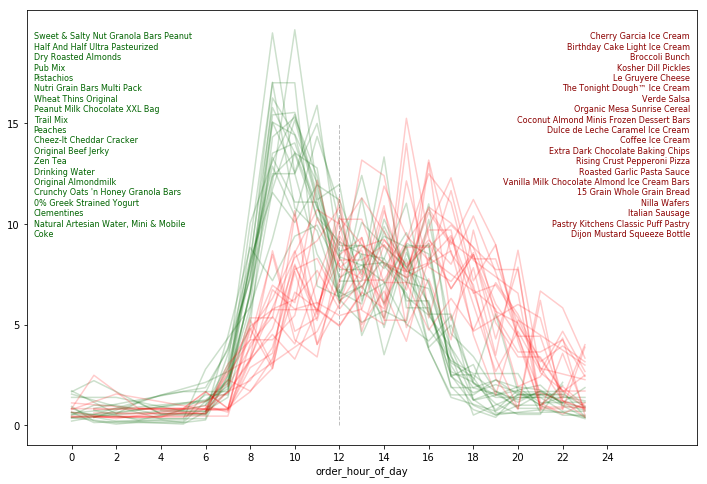

In [279]:
#finally, we can plot!
fig, ax = plt.subplots(figsize=(12, 8))

# Plot
morning_pct.groupby('product_id').plot(x='order_hour_of_day', 
                                       y='percent', 
                                       ax=ax, 
                                       legend=False,
                                       alpha=0.2,
                                       aa=True,
                                       color='darkgreen',
                                       linewidth=1.5,)
night_pct.groupby('product_id').plot(x='order_hour_of_day', 
                                         y='percent', 
                                         ax=ax, 
                                         legend=False,
                                         alpha=0.2,
                                         aa=True,
                                         color='red',
                                         linewidth=1.5,)
# Tick Range
tick_font_size = 10
ax.tick_params(labelsize=tick_font_size)
plt.xticks(range(0, 25, 2))
plt.yticks(range(0, 16, 5))
plt.xlim([-2, 28])

# Vertical line at noon
plt.vlines(x=12, ymin=0, ymax=15, alpha=0.5, color='gray', linestyle='dashed', linewidth=1.0)

# Text
text_font_size = 8
ax.text(0.01, 0.95, morn_names,
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes,
        color='darkgreen', fontsize=text_font_size)
ax.text(0.99, 0.95, night_names,
        verticalalignment='top', horizontalalignment='right',
        transform=ax.transAxes,
        color='darkred', fontsize=text_font_size);

Code was modified from: https://www.kaggle.com/shwong/the-instacart-chart

### Can we predict your order based on your first item?

In [281]:
import matplotlib.pylab as plt
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
import sklearn.metrics
from sklearn.metrics.pairwise import pairwise_distances

In [308]:
df_com.shape

(2000000, 13)

In [311]:
test=df_com.drop(columns=['order_dow', 'order_hour_of_day', 'days_since_prior_order', 'aisle_id', 'reordered'])

In [312]:
test.head()

,department_id,department,order_id,user_id,order_number,product_id,product_name,add_to_cart_order
0,1,frozen,3225766,3,8,48523.0,Birthday Cake Light Ice Cream,8.0
1,1,frozen,3160850,3,9,48523.0,Birthday Cake Light Ice Cream,5.0
2,1,frozen,121053,7,3,39121.0,Organic Jasmine Rice,3.0
3,1,frozen,3120740,7,15,21298.0,Organic Cake Cones,10.0
4,1,frozen,68288,10,2,20995.0,Organic Broccoli Florets,3.0


##### Reduce the dataset to meanigful data

In [305]:
#load in data
order_pred_orig=pd.read_csv('data/order_products__prior.csv')

In [306]:
#keep first 1 million orders and items 
order_pred=order_pred_orig.sample(n=1000000)

##### Methods

In [377]:
order.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [385]:
#load in data
order_pred_orig=pd.read_csv('data/order_products__prior.csv')

In [386]:
order_pred_orig.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [387]:
#merge on order_id to get the product name
order_pred_orig=order_pred_orig.merge(order, on='order_id', how='left')

In [388]:
order_pred_orig.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0


In [389]:
#merge on user_id to get the product name
order_pred_orig=order_pred_orig.merge(pdt, on='product_id', how='left')

In [390]:
order_pred_orig.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13


In [391]:
#obtain top 5000 items
pd_count_NN=pd_count.most_common(5000)

In [392]:
pd_count_NN[0:10]

[('Banana', 29044),
 ('Bag of Organic Bananas', 23120),
 ('Organic Strawberries', 16296),
 ('Organic Baby Spinach', 15214),
 ('Organic Hass Avocado', 12921),
 ('Organic Avocado', 10883),
 ('Large Lemon', 9477),
 ('Strawberries', 8839),
 ('Limes', 8702),
 ('Organic Whole Milk', 8486)]

In [393]:
#obtain list of only the names
pd_names_NN=[x[0] for x in pd_count_NN]

In [394]:
pd_names_NN[0:10]

['Banana',
 'Bag of Organic Bananas',
 'Organic Strawberries',
 'Organic Baby Spinach',
 'Organic Hass Avocado',
 'Organic Avocado',
 'Large Lemon',
 'Strawberries',
 'Limes',
 'Organic Whole Milk']

In [395]:
#create dataframe that only has an order of the top 5000 products
df_top=order_pred_orig[order_pred_orig['product_name'].isin(pd_names_NN)]

In [396]:
df_top.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13
5,2,17794,6,1,202279,prior,3,5,9,8.0,Carrots,83,4
6,2,40141,7,1,202279,prior,3,5,9,8.0,Original Unflavored Gelatine Mix,105,13


In [399]:
#drop columns not needed
order_products=df_top.drop(['product_id', 'order_id', 'add_to_cart_order', 'aisle_id', 'department_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order'],axis=1)

In [400]:
order_products.head()

,reordered,user_id,product_name
0,1,202279,Organic Egg Whites
1,1,202279,Michigan Organic Kale
2,0,202279,Garlic Powder
5,1,202279,Carrots
6,1,202279,Original Unflavored Gelatine Mix


In [401]:
len(order_products)

26414107

In [402]:
#only use 100,000 samples for now
order_products=order_products.sample(100000)

In [405]:
len(order_products)

100000

In [406]:
#develop piviot table for KNN
order_knn=order_products.pivot_table(values='reordered', index='product_name', columns='user_id')

In [407]:
order_knn=order_knn.fillna(-1)

In [408]:
order_knn.head()

user_id,8,10,17,21,24,27,29,31,35,38,...,206167,206174,206175,206176,206181,206186,206187,206193,206197,206199
product_name,,,,,,,,,,,,,,,,,,,,,
0% Fat Free Organic Milk,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
0% Fat Organic Greek Vanilla Yogurt,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
0% Greek Strained Yogurt,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
0% Greek Yogurt Black Cherry on the Bottom,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
"0% Greek, Blueberry on the Bottom Yogurt",-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [413]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [411]:
#condense matrix into csr
order_knn_matrix=csr_matrix(order_knn.values)

In [414]:
#initialize the model
model_knn=NearestNeighbors(metric='cosine',algorithm='brute')

In [415]:
#fit the model to our data
model_knn.fit(order_knn_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [448]:
query_index=np.random.choice(order_knn.shape[0])
distances, indices = model_knn.kneighbors(order_knn.iloc[query_index,:].values.reshape(1,-1), n_neighbors=6)
for i in range(0,len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0} : \n'.format(order_knn.index[query_index]))
    else:
        print('{0} : {1}'.format(i,order_knn.index[indices.flatten()[i]]))

Recommendations for Organic Australian Style Vanilla Lowfat Yogurt : 

1 : Organic Sprouted Wheat Sesame Bagels
2 : Organic Zucchini Squash
3 : Deviled Eggs
4 : Fire Roasted Crushed Tomatoes
5 : Everything Inside Bagels
